### 1、线性模型、线性回归与广义线性模型

#### 1.1 线性模型

**线性模型**试图习得一个通过属性的线性组合来进行预测的函数

$$f(x) = w_1x_1 + w_2x_2 + \dots + w_dx_d + b$$

向量形式：$f(\mathbf{x}) = \mathbf{w}^T\mathbf{x} + b$

线性模型的特点：简单、易用、可解释性强，应用场景广

#### 1.2 线性回归

* <font color=red>有监督学习</font> → 学习样本为$\mathcal{D} = \left\{\left(\mathbf{x}_i,y_i\right)\right\}_{i=1}^N$
* 输出/预测的结果$y_i$为<font color=red>连续值变量</font>
* 需要学习<font color=red>映射</font>，可以理解为自变量与因变量之间的函数关系
* 假定输入x和输出y之间有线性相关关系 $f : \mathcal{X} \mapsto \mathcal{Y}$

* 一个简单的例子

    * 身高预测例子

    让一个六年级的孩子在不问同学体重多少的情况下，把班上同学按照体重从轻到重排队。这个孩子会怎么做呢？

    他很可能会通过观察大家的身高和体格来排队。这个判断过程其中是隐藏着某种线性关系的，体重与身高的正比判断。

    * 房价预测例子（一元）

    * 房价预测例子（多元）

问题：如何表示$f$？

线性回归：假设函数$f$为输入$\mathbf{x}$的线性函数：

$$f(\mathbf{x}) = θ_0x_0 + θ_1x_1 + θ_2x_2 + \dots + θ_nx_n$$

写成向量形式（在特征$\mathbf{x}$中增加一维$x_0 = 1$，表示<font color=red>截距项</font>）：$f(\mathbf{x}) = \mathbf{θ}^T\mathbf{x}$

In [8]:
# 说明：
# 通过使用机器学习算法，习得线性模型

In [9]:
# 线性回归模型（一般指一次）
from sklearn.linear_model import LinearRegression
LinearR = LinearRegression()

# 多项式回归模型（一般指高次）(可以将原始维度特征映射到得到高维度特征)
from sklearn.preprocessing import PolynomialFeatures
Poly = PolynomialFeatures()

* 损失函数

    我们希望找到最好的权重/参数$θ = [θ_0,θ_1,\dots,θ_n]$。如何衡量“最好”？
通过调整权重$θ$以获得泛化能力强的模型，从数学的角度来理解，应该是满足使得取得这组样本最大可能的$θ$。

    我们把$x$到$y$的映射函数$f$记做$θ$的函数$h_θ(x)$定义损失函数为：
$$J(θ_0,θ_1,\dots,θ_n) = \frac{1}{2m}\sum_{i=1}^m\left(h_θ(x^{(i)}) - y^{(i)}\right)$$


* 最小化损失函数

    从直观上理解，或者是从数量统计角度来理解，是要最小化预测值与真实值之间的差距。
    均方误差损失是一个凸函数，或者叫做最小二乘。
    最小化损失函数，其实就最大化对数似然。
    
    
* 梯度下降

    既然线性回归的损失函数是一个凸函数，那么就可以使用梯度下降法迭代来求得极值
    逐步迭代减小损失函数（凸函数）如同下山，找准方向（斜率），每次迈进一小步，直至“山底”
    
    一元损失函数的参数更新：
    
    $$θ_1 := θ_1 - α\frac{d}{dθ_1}J(θ_1)$$
    
    二元损失函数的参数更新：
    
    $$θ_0 := θ_0 - α\frac{1}{m}\sum_{i=1}^m\left(h_θ(x^{(i)}) - y^{(i)})\right)$$
    
    $$θ_1 := θ_1 - α\frac{1}{m}\sum_{i=1}^m\left(h_θ(x^{(i)}) - y^{(i)}\right) \cdot x^{(i)}$$
    
    
* 梯度下降学习率的影响

    * 太小收敛速度太慢
    * 太大会震荡甚至不收敛 - 一般使用梯度下降，发现数据出现来回震荡，也就说明到了局部极小值点了
    

* 欠拟合与过拟合（以多项式回归为例）

    * <font color=red>欠拟合</font>：模型没有很好地捕捉到数据特征，不能够很好地拟合数据
    * <font color=red>过拟合</font>：把样本中的一些噪声特征也学习下来了，泛化能力差
    
    实际工业界使用的各种模型都存在过拟合的风险：
    
        * 更多的参数/特征，更复杂的模型，通常有更强的学习能力，但是更容易“失去控制”（使用过于复杂的模型能够拟合现有训练集数据，但是在遇到新数据并非有很好的表现）
        * 训练集中有一些噪声，并不代表全量真实数据的分布，死记硬背会丧失泛化能力（噪声数据会带偏模型）
        
        
* 过拟合与正则化

    通过正则化添加参数“惩罚”，控制参数幅度，限制参数搜索空间，减小过拟合风险
    
    $$J(θ_0,θ_1,\dots,θ_n) = \frac{1}{2m}\sum_{i=1}^m\left(h_θ(x^{(i)}) - y^{(i)}\right)^2$$
    
    $$\Downarrow$$
    
    $$J(θ_0,θ_1,\dots,θ_n) = \frac{1}{2m}\left[\sum_{i=1}^m\left(h_θ(x^{(i)}) - y^{(i)}\right)^2 + λ\sum_{j=1}^nθ_j^2\right]$$
    
    <font color=orange>说明：添加的正则化项，其实就是一个测度项，并且这个测度项，是要求满足标准正太分布的，根据正太分布的性质，加上一个常数，
    其结果仍然服从正太分布，可知该正则化项时为了将过拟合的结果数据拉倒正则化曲线上，以便能够用来预测新的数据。所谓的“惩罚项”，也就基于这种统计思想。这边的$θ_j^2$其实就是一个L2正则，也就是岭回归。</font>
    
    存在过拟合的两种情况，一种是模型学的过好，另一种是噪声影响模型，故而需要有个调和因子来调整损失函数，中和好坏两种情况。
    
    从另一个角度来理解，其实是加入了一个约束项，不等式约束，加入正则化后的损失函数类似拉格朗日函数，这边的λ类似拉格朗日乘子。以这种方法拉大了极小值的取值范围，继而达到取其可行域内的极值。

#### 1.3 广义线性模型

对于样本$(x,y),y∈\mathbb{R}$，如果我们希望用线性的映射关系去逼近$y$值，可以得到线性回归模型$y = \mathbf{w}^T\mathbf{x} + b$

有时候关系不一定是线性的，如何逼近$y$的衍生物？

比如令 $\ln y = \mathbf{w}^T\mathbf{x} + b$

则得到对数线性回归，实际是在用$e^{\mathbf{w}^T\mathbf{x} + b}$逼近$y$，比如我们的逻辑回归模型。

In [10]:
# 说明：
# 线性、非线性，主要取决于自变量受影响的参数个数，如果说，一个参数影响一个自变量，自然是线性模型，而一个自变量受多个参数影响，则是非线性的。
# 一般说的线性都是说直线，一般的高次曲线都是非线性的，而多项式线性回归、对数线性回归，我们都可以理解为是广义线性模型。

要点总结

* 线性回归

    * 线性映射关系
        * $\widehat{y} = \mathbf{θ}^T\mathbf{X}$
    * 损失函数
        * MSE：评估与标准答案之间的差距
    * 梯度下降
        * 沿着损失函数梯度方向逐步修正参数
        * 学习率影响
    * 模型状态
        * 过拟合
        * 欠拟合
        
* 广义线性回归
    * 对线性映射的结果进行数学变换，取逼近$y$值
    
        * 指数(exp)或者对数(log)变换处理
   

### 2、逻辑回归

#### 2.1 从线性回归到逻辑回归

分类问题可以通过**线性回归+阈值**去解决吗？

对于简单的分类，或许可以使用线性回归去分类，但是很多情况都是很复杂的，单单使用线性回归和阈值的方法，是会出现误分类的情况的！

分类问题在有噪声点的情况下，阈值偏移大， 健壮性不够。噪声点会影响阈值的变化导致分类器不准确。

#### 2.2 逻辑回归决策边界

在逻辑回归里，通常我们并不拟合样本分布，而是确定决策边界

一般决策边界有：线性决策边界和非线性决策边界

说明：逻辑回归是用于解决分类问题，不是预测数值，不需要去拟合样本分布

对于线性回归输出的是连续值，用于预测，要对数据进行分类，需要进行函数映射，套用sigmod函数，该函数能够输出[0,1]的概率值，将$y$值压缩0到1之间，可以认为是一个广义线性模型，而0.5的概率值可以认为就是分类器的决策边界，一系列的$x^{(i)}$能够使得$y = 0$，继而输出0.5。

逻辑回归的预测函数：

$$h_θ(x) = \frac{1}{1 + e^{-θ^Tx}}$$

* 线性决策边界

    $h_θ(x) = g(θ_0 + θ_1x_1 + θ_2x_2)$，当$-3 + x_1 + x_2 \geqslant 0$时，$h_θ(x)  \geqslant 0$，判定结果大于等于0.5

* 非线性决策边界

    $h_θ(x) = g(θ_0 + θ_1x_1 + θ_2x_2 + θ_3x_1^2 + θ_4x_2^2)$
    
    $h_θ(x) = g(θ_0 + θ_1x_1 + θ_2x_2 + θ_3x_1^2 + θ_4x_1^2x_2 + θ_5x_1^2x_2^2 + θ_6x_1^3x_2 + \dots)$

#### 2.3 逻辑回归损失函数

逻辑回归损失函数是否还用线性回归的损失函数均方误差MSE呢？

显然从线性函数的损失函数$J(θ) = \frac{1}{2m}\sum_{i=1}^m\left(h_θ(x^{(i)}) - y^{(i)}\right)^2$可以看出，因逻辑函数的预测函数是$h_θ(x^{(i)}) = \frac{1}{1 + e^{-θ^Tx^{(i)}}}$是个广义线性模型，继而逻辑回归的损失函数再使用MSE必然是个非凸函数，对于非凸函数，只能求得局部极小值，固然MSE不再使用作为逻辑回归的损失函数。

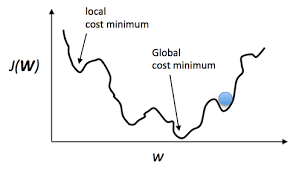

我们当然是希望损失函数是凸函数，能够求得全局极小值

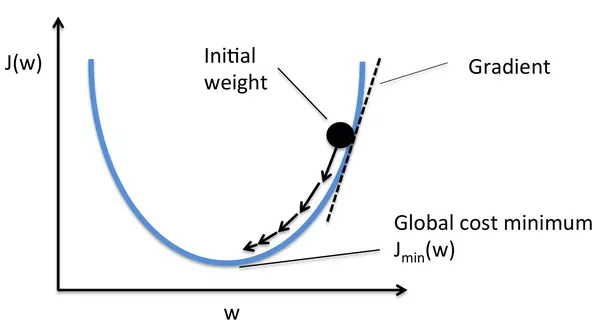

* 对数损失/二元交叉熵

$$Cost (h_θ(x),y) =
\begin{cases}
-log\left(h_θ(x)\right) & if y =1 \\
-log\left(1 - h_θ(x)\right) & if y = 0
\end{cases}$$

逻辑回归的损失函数$h_θ(x)$是输出0到1的概率值，而对于概率输出值为0.5~1之间的数值，被认为分类为1的正样本，而0~0.5之间的概率值，则是分类为0的负样本，当$y = 1$为正样本时，损失为0，然而如果输出概率值为0.8，则有约为0.09的损失。为什么会使用对数log，因预测函数存在指数exp，需要对数去幂，为计算方便，当y实际为1，输出不为1的实际损失为
    
$$\begin{align*}
-\log\left(\frac{1}{1 + e^{-θ^Tx}}\right)
&= -\left(\log1 - \log\left(1 + e^{-θ^Tx}\right)\right) \\
&=\log\left(1 + e^{-θ^Tx}\right)
\end{align*}$$

y为0，输出不为0的实际损失为

$$\begin{align*}
-\log\left(1 - \frac{1}{1 + e^{-θ^Tx}}\right)
&=-\log\left(\frac{e^{-θ^Tx}}{1 + e^{-θ^Tx}}\right) \\
&=-\left(\log e^{-θ^Tx} - \log\left(1 + e^{-θ^Tx}\right)\right) \\
&=\log\left(1 + e^{-θ^Tx}\right) + θ^Tx
\end{align*}$$

进一步分析，逻辑损失函数其实是类似0-1分布的似然函数的，0-1分布说的是取出某个数是1的概率是μ，则是0的概率就为1-μ，从这个角度理解对数损失很相似，只是取了对数并加了负号...

* 损失函数与正则化

    依旧存在过拟合问题，决策边界可能“抖动很厉害”

$$\begin{align*}
J(θ) &= \frac{1}{m}\sum_{i=1}^mCost\left(h_θ\left(x^{(i)}\right),y^{(i)}\right) \\
      &= -\frac{1}{m}\left[\sum_{i=1}^m y^{(i)} \log h_θ\left(x^{(i)}\right) + \left(1 - y^{(i)}\right) \log \left(1 - h_θ\left(x^{(i)}\right) \right)\right]
    \end{align*}$$
    
$$\Downarrow 添加正则化项$$
    
$$J(θ) = -\frac{1}{m}\left[\sum_{i=1}^m y^{(i)} \log h_θ\left(x^{(i)}\right) + \left(1 - y^{(i)}\right) \log \left(1 - h_θ\left(x^{(i)}\right) \right)\right] + \frac{λ}{2m}\sum_{j=1}^nθ_j^2$$

注意：这边的$\theta_j$是从[1, n]的，少一个[0]，$\theta_0$是不需要正则的，也不需要参与优化

In [11]:
# 说明：
# 无论是线性回归，还是逻辑回归，我们优化的目标都是损失函数，求取使得损失最小的参数θ
# 继而获取预测函数，用于新数据的预测
# 线性回归的过拟合是拟合样本的分布，得到的模型对于新数据不具有泛化能力；而逻辑回归则
# 是决策边界过于曲折，对于新样本也不具有分类能力

* 如何最小化损失函数？

对于凸函数，依旧可以用梯度下降！其实可以直接用梯度为0求极值！

$$J(θ) = -\frac{1}{m}\left[\sum_{i=1}^m y^{(i)} \log h_θ\left(x^{(i)}\right) + \left(1 - y^{(i)}\right) \log \left(1 - h_θ\left(x^{(i)}\right) \right)\right] + \frac{λ}{2m}\sum_{j=1}^nθ_j^2$$

$$\Downarrow$$

$$θ_j := θ_j - α\frac{\partial}{\partialθ_j}J(θ)$$

#### 2.4 逻辑回归正则化的几何意义

Lasso正则和Ridge正则适用于所有目标函数，一般我们说的Lasso Regression是在线性回归上加上L2范数的正则，同样有Ridge Regression...

L1正则化通常称为Lasso正则化：

$$J(θ) = -\frac{1}{m}\left[\sum_{i=1}^m y^{(i)} \log h_θ\left(x^{(i)}\right) + \left(1 - y^{(i)}\right) \log \left(1 - h_θ\left(x^{(i)}\right) \right)\right] + \frac{λ}{m}\sum_{j=1}^n\|θ_j\|$$

L2正则化通常称为Ridge正则化：

$$J(θ) = -\frac{1}{m}\left[\sum_{i=1}^m y^{(i)} \log h_θ\left(x^{(i)}\right) + \left(1 - y^{(i)}\right) \log \left(1 - h_θ\left(x^{(i)}\right) \right)\right] + \frac{λ}{2m}\sum_{j=1}^n\|θ_j\|_2^2$$

从上式中可以想到拉格朗日函数：

$$J(θ,λ) = f(θ) + vg(θ)$$

从这个角度来理解，正则化项就是等式约束部分，如下：

对于L1正则化（Lasso正则化）：$g(θ) = \frac{λ}{m}\sum_{j=1}^n\|θ_j\|$

对于L2正则化（Ridge正则化）：$g(θ) = \frac{λ}{2m}\sum_{j=1}^n\|θ_j\|_2^2$

而对于L1正则化，其约束图形是一个菱形；而L2正则化，则是一个圆。

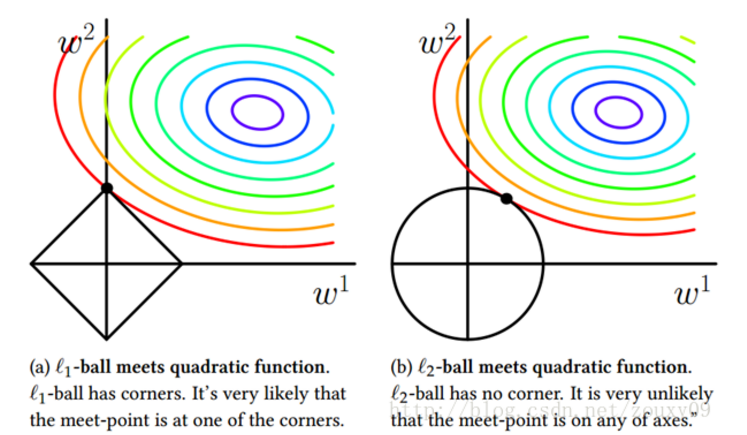

#### 2.5 从二分类到多分类

* 多分类

我们已经知道二分类问题如何处理了，那么多分类呢？

* one vs all：一对多，每次都做二分类，并分出一类
* one vs rest：每次都两两分类

要点总结

* 逻辑回归
    * 线性回归 + 阈值
        * 解决分类问题鲁棒性不OK
    * Sigmod函数与决策边界
        * Sigmod函数：压缩至0-1之间
        * 根据阈值，产生对应的决策边界
    * 损失函数
        * 最大似然到对数损失
    * 梯度下降
        * 沿着损失函数梯度方向逐步修正参数
    * 二分类到多分类
        * one vs one
        * one vs rest

### 3、工程应用经验

#### 3.1 逻辑回归 VS 其它模型

LR 弱于 SVM/GBDT/RandomForest...？

* 模型本身并没有好坏之分？

    1. LR能以概率的形式输出结果，而非只是0,1判定（使用AUC做模型评估较好）
    2. LR的可解释性强，可控度高
    3. 训练快，特征工程之后效果赞
    4. 因为结果是概率，可以做排序模型
    5. 添加特征非常简单...
    
* 应用

    1. CTR预估/推荐系统的learning to rank/各种分类常见
    2. 很多搜索引擎厂的广告CTR预估基线版是LR
    3. 电商搜索排序/广告CTR预估基线版是LR
    4. 新闻APP的推荐和排序极限也是LR

#### 3.2 样本处理

* 样本特征处理
    * 离散化后用独热向量编码处理成0,1值
    * LR训练连续值，注意做幅度缩放（大部分特征离散化后都是0,1较小的值，而出现比较大的连续值，在矩阵运算时会受影响，特别是在梯度下降迭代过程中，导致梯度过大，最终不收敛等情况）
    
* 处理大样本量
    * 试试Spark MLlib
    * 试试采样（注意是否需要分层采样）
   
* 注意样本的平衡
    * 对样本分布敏感 - 样本参与损失函数计算
    * 欠采样，过采样
    * 修改损失函数，给予不同权重
    
    How large samples size you need to meet your goal?
    
    reference: https://veekaybee.github.io/2015/08/04/how-big-of-a-sample-size-do-you-need/

#### 3.3 工具包与库

* Liblinear：台湾大学林轩田教授带领使用C语言开发的LR库，一般线上环境会使用这个，因使用C开发，稳定性和速度都很好。同时还有LIBSVM。

    https://www.csie.ntu.edu.tw/~cjlin/liblinear/

* Spark MLlib：Spark的一个ML组件，用于大样本的机器学习使用。

    http://spark.apache.org/docs/latest/mllib-linear-methods.html

* Scikit-learn：Python开发的机器学习工具包，几乎包含所有的监督、非监督回归、分类算法，一般是在测试开发阶段使用，比较方便快捷。

    http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

要点总结

* 逻辑回归
    * 优缺点
        * 优点：可解释性强、输出概率结果、可用于排序、添加特征方便
        * 缺点：模型效果与特征工程程度有关系、数据要做好预处理
    * 样本与初级处理
        * 数据样本采样
        * 特征离散化、独热向量编码
    * 工具包
        * Liblinear | Spark MLlib | Scikit-learn

### 4、数据案例讲解

#### 4.1 Python完成线性回归与逻辑回归

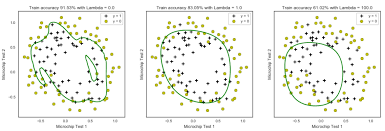

### 5、玩转逻辑回归算法之金融评分卡模型

即便有很多优秀的分类算法，如SVM、RF、GBDT、DNN等，LR依然是工业界主流的分类算法之一，屹立不倒！！

#### 5.1 评分卡模型的背景知识

风控顾名思义就是风险控制，指风险管理者采取各种措施和方法，消灭或减少风险事件发生的各种可能性，或风险事件发生时造成的损失。

信用评分卡模型是最常见的金融风控手段之一，它是根据客户的各种属性和行为数据，利用一定的信用评分模型，对客户进行信用评分，据此决定时候给予授信以及授信的额度和利率，从而识别和减少金融交易中存在的交易风险。

评分卡模型在不同的业务阶段体现的方式和功能也不一样，按照借贷用户的借贷时间，评分卡模型可以划分为以下三种：

* 贷前：申请评分卡，又称为A卡
* 贷中：行为评分卡，又称为B卡
* 贷后：催收评分卡，又称为C卡

以下为评分卡模型的示意图：

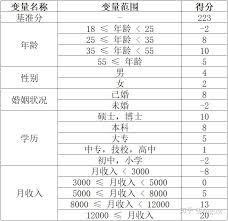

那么怎么利用评分卡对用户进行评分呢？一个用户总的评分等于基准分加上对客户各个属性的评分。以上面的评分卡为例：

$$客户评分 = 基准分 + 年龄评分 + 性别评分 + 结婚状况评分 + 学历评分 + 月收入评分$$

对于以上评分卡，可能会存在以下三个疑问：

* 用户的属性维度那么多，为什么只选择这几个？一般评分卡模型所选字段在30个以下，如何正确挑选这些字段呢？
* 评分卡模型采用的是对每个字段的分段进行评分，那么怎样对评分卡进行有效分段呢？
* 最关键的，应该是如何对每个字段进行评分，评分是按照怎样的标准计算得到的？

#### 5.2 评分卡模型的开发

#### 5.2.0 总体流程介绍

信用评分卡的开发有一套科学的、严密的流程，包括数据获取、EDA、数据预处理、到变量筛选，LR模型的开发和评估，生成评分卡模型以及布置上线和模型监测。典型的开发流程如下图所示：

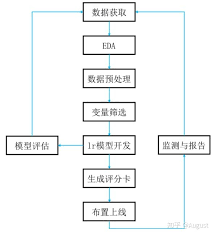

#### 5.2.1 数据获取

数据获取途径主要有两个：

* 金融机构自身字段：例如用户的年龄、户籍、性别、收入、负债比，在本机构的借款和还款行为等；
* 第三方机构的数据：如用户在其它机构的借贷行为，用户的消费行为数据等

#### 5.2.2 EDA（探索性数据分析）

该步骤主要是获取数据的大概情况例如每个字段的缺失值情况、异常值情况、平均值、中位数、最大值、最小值、分布情况等。以便制定合理的数据预处理方案。

#### 5.2.3 数据预处理

数据预处理主要包括数据清洗，变量分箱和WOE编码三个步骤。

#### 5.2.3.1 数据清洗

数据清洗主要是对原始数据中脏数据、缺失值，异常值进行处理。关于对缺失值和异常值的处理，直接采用比较粗暴的方法，即删除缺失率超过某一阈值（阈值自行设定，可以为30%，50%，90%等）的变量，将剩余变量中的缺失值和异常值作为一种状态。

In [12]:
# 说明：
# 金融领域的异常值和缺失值不建议使用填充、插值等方法进行补全，补全的数据不具有代表性，且不真实。

#### 5.2.3.2 变量分箱

评分卡模型是通过对变量进行分箱来实现变量的分段的。那么什么是分箱呢？以下为分箱的定义：

* 对连续变量进行分段离散化；
* 将多状态的离散变量进行合并，减少离散变量的状态数。

常见的分箱类型有以下几种：

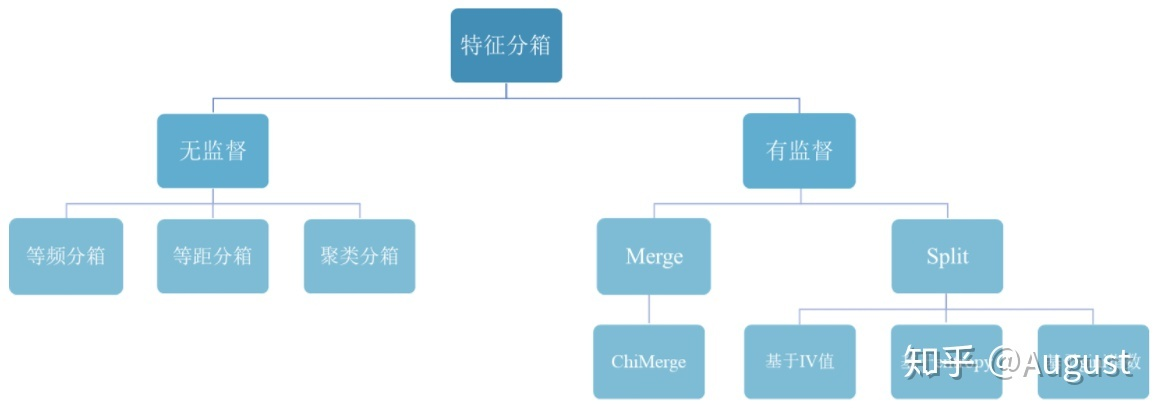

**1. 无监督分箱**

无监督的分箱主要包括以下几类：

(1) 等频分箱：把自变量按从小到大的顺序排列，根据自变量的个数等分为k部分，每部分作为一个分箱。

(2) 等距分箱：把自变量按从小到大的顺序排序，将自变量的取值范围分为k个等距的区间，每个区间作为一个分箱。

(3) 聚类分箱：用k-means聚类法将自变量聚为k类，但在聚类过程中需要保证分箱的有序性。

由于无监督分箱仅仅考虑了各个变量自身的数据结构，并没有考虑自变量与目标变量之间的关系，因此无监督分箱不一定会带来模型性能的提升。

<font color=orange>说明：各个变量之间的关系，也就是特征之间的关系。对变量进行分箱操作是减少维度过高带来的计算量，以此提升模型的性能。因无监督分箱主要还是针对每个特征内部的数据结构进行缩减类别操作，从本质上并没有考虑各个属性的关系，以此来进行变量的分箱缩减，固然模型性能并不一定有多少提升。</font>

**2. 有监督分箱**

包括Split分箱和Merge分箱

1. Split分箱是一种自上而下（即基于分裂）的数据分段方法。如下图所示，Split分箱和决策树比较相似，切分点的选择指标主要有entropy，gini指数和IV值等。

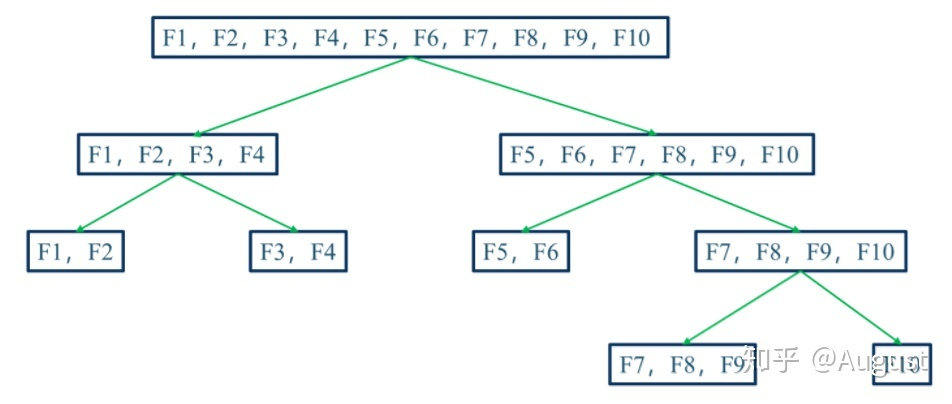

<font color=orange>说明：对于从F1到F10在哪个点进行划分，选择的依据是信息熵大的，或者是gini指数小的点进行划分，类似于决策树的划分。
    
从物理上来说，信息熵越大，表明系统越混乱，或者说更分散，系统越有序，则熵越小；而从信息论角度来说，表明了信息熵越大，表明数据越分散，越小则信息越集中。

此处的F1 , ... , F10可以理解为特征下的属性值，有连续值和离散值。</font>

2. Merge分箱，是一种自底向上（基于合并）的数据离散化方法。如下图所示Merge分箱的示意图，Merge分箱常见的类型为Chimerge分箱。

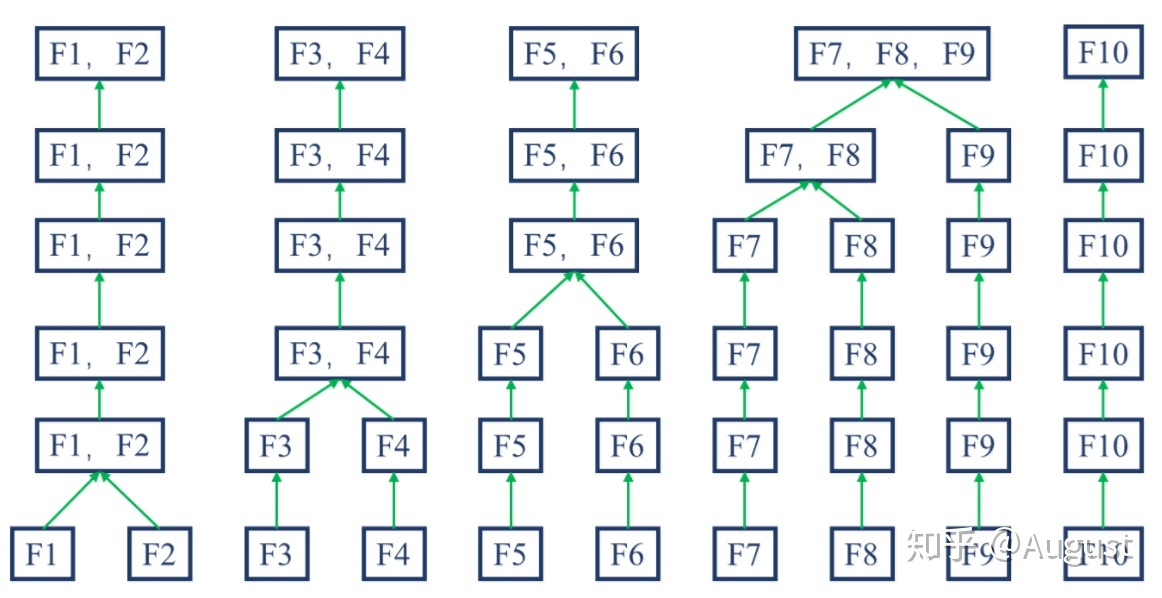

Chimerge分箱是目前最流行的分箱方式之一，其基本思想是如果两个相邻的区间具有类似的类分布，则这两个区间合并；否则应保持分开。Chimerge通常采用卡方值来衡量两相邻区间的类分布情况。

Chimerge的具体算法如下：

* 输入：分箱的最大区间数$n$
* 初始化：
    * 连续值按升序排列，<font color=red>离散值先转化为坏客户的比率，</font>然后再按升序排列；<font color=orange>说明：粗分箱中每个分箱都可以得出坏客户占比。</font>
    * 对于变量数量大于某一阈值（阈值可以自定义，建议为100）的变量，为了减少计算量利用等频分箱进行粗分箱。<font color=orange>说明：属性下的特征值如果大于预设的阈值，建议先进行等频粗分箱，如离散型属性值采用独热向量变量很容易就超过100个。</font>
    * 若有缺失值，则缺失值单独作为一个分箱。<font color=orange>说明：采用这种方法单独处理缺失值和异常值数据。</font>
* 合并区间
    * 计算每一对相邻区间的卡方值。
    * 将卡方值最小的一对区间合并。
    
    $$X^2 = \sum_{i=1}^2\sum_{j=1}^2\frac{(A_{ij} - E_{ij})^2}{E_{ij}}$$

    $A_{ij}$：第$i$区间第$j$类的实例数量。<font color=orange>说明：第$i$个分组里每个$j$类别都会有多个样本。粗分箱是这第$i$个分箱，而每个分箱$i$里是等频的数据，这些数据存在类别相同的数据，也就是这边的$j$类别，根据最小卡方值两两合并，直到分箱数量不大于n。</font>  
    $E_{ij}$：$E_{ij} = \frac{N_i}{N} \times C_j$，$N$是合并区间的样本数，$N_i$是第$i$组的样本数，$C_j$是第$j$类样本在合并区间的样本数。<font color=orange>说明：有点类似第$j$个类别在整个合并区间占的权重。</font>
    
    * 重复以上两个步骤，直到分箱数量不大于$n$
* 分箱后处理
    * 对于坏客户比例为0或1的分箱进行合并（一个分箱内不能全为好客户或者全为坏客户）。
    * 对于分箱后某一箱样本占比超过95%的箱子进行删除（分箱不均衡，不具有代表性。）
    * 检查缺失分箱的坏客户比例是否和非缺失分箱相等，如果相等，进行合并。
* 输出：分箱后的数据和分箱区间。

一般一个评分卡模型的有效持续时间是一个月左右甚至更长时间，中间若有一些客户的形式发生变化，只要在合理范围内，模型是已经把这种变化考虑进去了，所以不会因此对模型评估造成影响，保证了模型的稳定性。

一般模型会把缺失值和异常值单独分箱处理，最后评估是否再合并，而异常值的情况，一般也包括在开区间内，所以也不会对模型造成影响。

变量分箱，其实就是对每个数据属性下的多个类别进行合并操作，得到最终满足要求的各个分段。

总结 - 特征分箱的优势：

1. 特征分箱可以有效处理特征中的缺失值和异常值。
2. 特征分箱后，数据和模型会更稳定。（维度小了，自然更稳定。）
3. 特征分箱可以简化逻辑回归模型，降低模型过拟合的风险，提高模型的泛化能力。
4. 将所有特征统一变换为类别型变量。
5. 分箱后变量才可以使用标准的评分卡格式，即对不同的分段进行评分。


#### 5.2.3.3 WOE编码

分箱后我们得到了一系列的离散变量，下面需要对变量进行编码，将离散变量转化为连续变量，WOE编码是评分卡模型常用的编码方式。

WOE成为证据权重（Weight Of Evidence），是一种有监督的编码方式，将预测类别的集中度的属性作为编码的数值。对于自变量第$i$箱的WOE值为：

$$WOE_i = \ln \left(\frac{p_{i1}}{p_{i0}}\right) = \ln \left(\frac{\text{#}B_i/\text{#}B_T}{\text{#}G_i/\text{#}G_T}\right)$$

$p_{i1}$ 是第$i$箱中坏客户占所有坏客户比例

$p_{i0}$ 是第$i$箱中好客户占所有好客户比例

$\text{#}B_i$ 是第$i$箱中坏客户人数

$\text{#}G_i$ 是第$i$箱中好客户人数

$\text{#}B_T$ 是所有坏客户人数

$\text{#}G_T$ 是所有好客户人数

从以上公式中可以看出，WOE表示的实际上是“当前分箱中坏客户占所有坏客户的比例”和“当前分箱中好客户占所有好客户的比例”的差异。

对以上公式做一个简单变换，可以得到：

$$WOE_i = \ln\left(\frac{\text{#}B_i/\text{#}B_T}{\text{#}G_i/\text{#}G_T}\right) = \ln\left(\frac{\text{#}B_i/\text{#}G_i}{\text{#}B_T/\text{#}G_T}\right)$$

变换后的式子，我们也可以这么理解，当前分箱中坏客户和好客户的比值，和所有样本中好坏客户比值的差异（也就是随机坏客户和好客户的比例）。WOE越大，这种差异越大，当前分子里的坏客户的可能性就越大，WOE越小，差异越小，这个分组里的样本响应的可能性就越小。当分箱中坏客户和好客户的比例等于随机坏客户和好客户的壁纸时，说明这个分箱没有预测能力，即WOE=0。

WOE具体计算过程如下表所示：

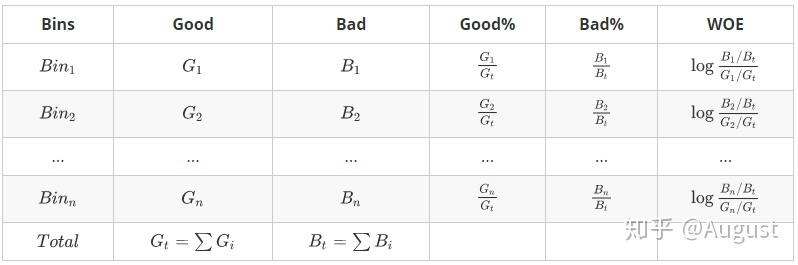

WOE编码，对比用于离散值处理的One-hot编码。One-hot编码会将原始变量中的每个状态都作为一个新的特征，当原始特征状态较多时，数据经过One-hot编码后特征数量会成倍增加，同时特征也会变得过于稀疏。在进行变量筛选时，也会出现原始特征的一部分状态被筛选出来，另一部分状态未被筛选出来，造成特征的不完整。而使用WOE编码不仅可以解决这些问题，同时还可以将特征转换为线性。

<font color=orange>说明：经过变量筛选后，很显然筛选出的变量不足以表达原始变量的特征。</font>

无论是One-hot Encoder还是WOE编码都是用来表征特征的，为了让计算可以识别，但是也何种方式编码，已经编码后的数据运算更好，就得根据情况选择！

我们知道，逻辑回归的假设函数为：

$$p = \frac{1}{1 + e^{-θ^Tx}}$$

其中$p$为样本中坏客户的概率，$1-p$为样本为好客户的概率，整理可得：

$$\ln\left(\frac{p}{1 - p}\right) = θ^Tx$$

其中$\text{odds} = \frac{p}{1 - p}$

我们再来看WOE编码的定义：

$$\begin{align*}
WOE_i &= \ln\left(\frac{\text{#}B_i/\text{#}G_i}{\text{#}B_T/\text{#}G_T}\right) \\
&= \ln\left(\frac{\text{#}B_i}{\text{#}G_i}\right) - \ln\left(\frac{\text{#}B_T}{\text{#}G_T}\right) \\
&= \ln\left(\frac{\text{#}B_i/(\text{#}B_i + \text{#}G_i)}{\text{#}G_i/(\text{#}B_i + \text{#}G_i)}\right) - \text{Const} \\
&= \ln\left(\frac{p_i}{1 - p_i}\right) - \text{Const}
\end{align*}$$

其中$p_i$表示第$i$个分箱的坏客户比率，类比$\frac{p_i}{1 - p_i}$表示的是第$i$个分箱的$\text{odds}$。我们设$\ln\left(\frac{p}{1 - p}\right)  = C$，那么$\ln\left(\frac{p_i}{1 - p_i}\right)  = C_i$，逻辑回归假设函数可以简化为：

$$C = θ^T(C_i - \text{Const})$$

其中$x_i = C_i - \text{Const}$为分箱后经过WOE便后的输入特征。WOE编码前都是离散特征数据，这些离散的特征数据是非线性的。

实际上WOE编码相当于把分享后的特征从非线性可分映射到近似线性可分的空间内。如下图所示：

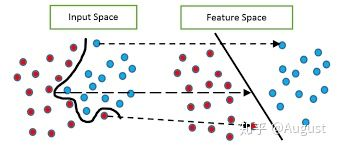

WOE编码为什么没有直接使用好坏客户数量之比，即$WOE_i = \ln \left(\frac{\text{#}B_i}{\text{#}G_i}\right)$？

如果直接表示为某个分箱好坏客户数量之比，WOE的值在很大程度上受到好坏客户的影响，在严重非均衡的问题中，该比值会非常小，严重影响WOE的值。

若分箱后的好坏客户比例与整体的好坏客户比例相同，则说明这个分箱是没意义的，也就不具备预测的能力，等于没分箱。

从公式中看出，采用好坏客户数量之比，只能判断分箱后的好坏客户比例，无法判断分箱后数据的预测能力。

<font color=orange>说明：金融行业的数据都是高维度特征的数据，采用对变量分箱，以降到计算量，并采用WOE编码对分箱后的离散数据连续化，使用坏客户率和好客户率之比作为分箱后模型的评估指标，而没有采用One-hot编码，避免再次带来维度灾难，和稀疏性的问题。其实，WOE编码另一层意思也可以理解为该分箱的预测能力，或对模型的作用，可以作为分箱的一种评估指标。<font>

总结一下WOE编码的优势：

* 可提升模型的预测效果
* 将自变量规范到同一尺度上
* WOE能反映自变量取值的贡献情况
* 有利于对变量的每个分箱进行评分
* 转化为连续变量之后，便于分析变量与变量之间的相关性
* 与独热向量编码相比，可以保证变量的完整性，同时避免系数矩阵和维度灾难

#### 5.2.4 变量筛选

评分卡模型所选用的字段一般在30个以下，那又是如何筛选这些字段的呢？

挑选入模变量需要考虑很多因素，比如：变量的预测能力，变量之间的线性相关性，变量的简单性（容易生成和使用），变量的强壮性（不容易被绕过），变量在业务上的可解释性（被挑战时可以解释的通）等等。其中最主要和最直接的衡量标准是变量的预测能力和变量的线性相关性。以下主要探讨基于变量预测能力的单变量筛选，变量两两相关性分析，变量的多重共线性分析。

#### 5.2.4.1 单变量筛选

单变量的筛选基于变量预测能力，常用方法：

* 基于IV值的变量筛选
* 基于stepwise的变量筛选
* 基于特征重要度的变量筛选：RF，GBDT...
* 基于Lasso正则化的变量筛选

**1. 基于IV值的变量筛选**

IV称为信息价值，是目前评分卡模型中筛选变量最常用的指标之一，自变量的IV值越大，表示自变量的预测能力越强。类似的指标还有信息增益、基尼(gini)系数等。常用判断标准如下：

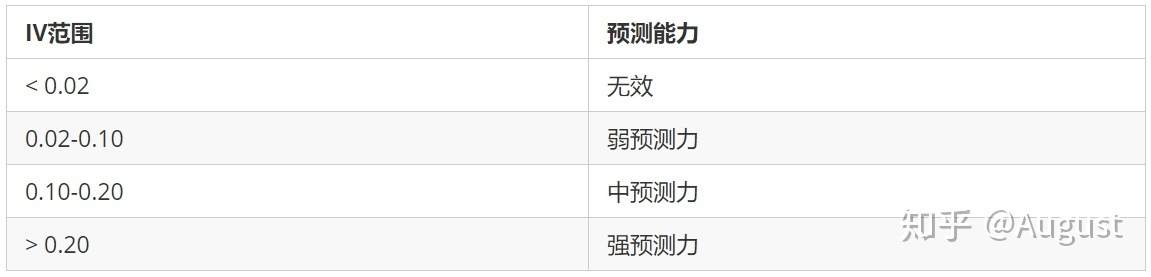

那么怎么计算变量中第$i$个分箱对应的IV值得计算公式为：

$$IV_i = \left(\frac{\text{#}B_i}{\text{#}B_T} - \frac{\text{#}G_i}{\text{#}G_T}\right) * \log \left(\frac{\text{#}B_i/\text{#}B_T}{\text{#}G_i/\text{#}G_T}\right) = \left(\frac{\text{#}B_i}{\text{#}B_T} - \frac{\text{#}G_i}{\text{#}G_T}\right) * WOE_i$$

变量对应的IV值为所有分箱对应的IV值之和：

$$IV = \sum_{i}^nIV_i$$

从上式中可以看出变量的IV值实际上是变量各个分箱的加权求和。且和决策树中的交叉熵有异曲同工之妙。以下为交叉熵公式：

$$Ent(D) = -\sum_{i=1}^np_i \log p_i$$

IV值得具体的计算流程如下：

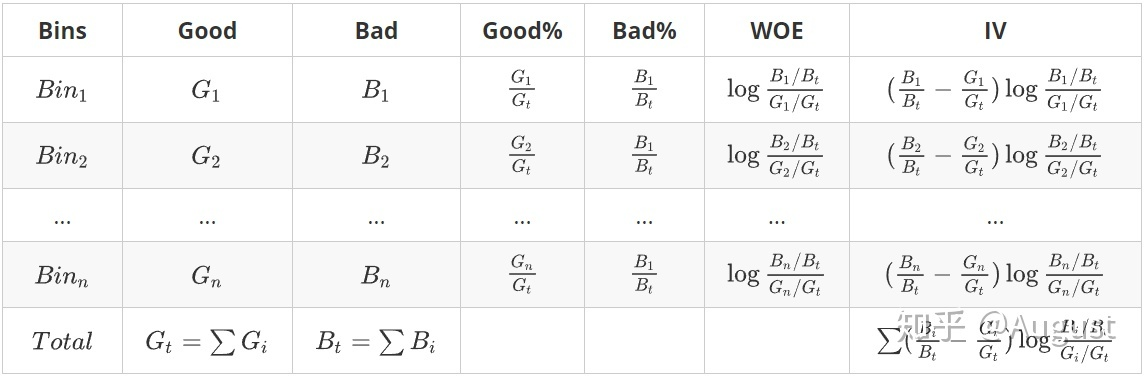

以下为一个计算WOE和IV值的例子：

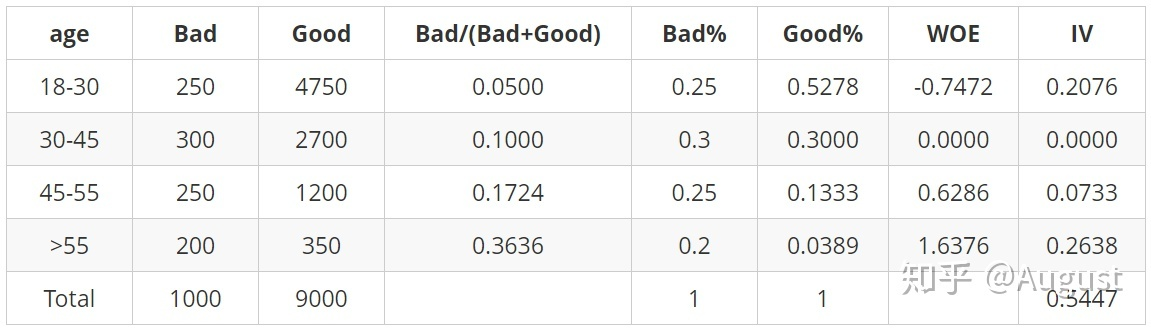

从以上案例中我们可以分析出：

* 当前分箱中，坏客户占比越大，WOE值越大；
* 当前分箱中WOE的正负，由当前分箱中好坏客户比例，与样本整体好坏客户比例的大小关系决定。
    * 当分箱的比例小于整体比例时，WOE为负。
    * 当分箱的比例大于整体比例时，WOE为正。
    * 当分箱的比例等于整体比例时，WOE为0。
* WOE的取值范围是[-∞,+∞]，当分箱中好坏客户比例等于整体好坏客户比例时，WOE为0。
* 对于变量的一个分箱，这个分组的还坏客户比例与整体好坏客户比例相差越大，IV值越大，否则，IV值越小。（以此可以得出坏客户的多寡）
* IV值的取值范围是[0,+∞)，当分箱中只包含好客户或坏客户时，IV = +∞，当分箱中好坏客户比例等于整体好坏客户比例时，IV为0。

**2. 基于stepwise的变量筛选**

基于stepwise的变量筛选方法也是评分卡中变量筛选最常用的方法之一。具体包括三种筛选变量的方式：

* 前向选择forward：逐步将变量一个一个放入模型，并计算相应的指标，如果指标值符合条件，则保留，然后再放入下一个变量，直到没有符合条件的变量纳入或者所有的变量都可纳入模型。
* 后向选择backward：一开始讲所有变量纳入模型，然后挨个移除不符合条件的变量，持续此过程，直到留下所有最优的变量为止。
* 逐步选择stepwise：该算法是向前选择和向后选择的结合，逐步放入最优的变量、移除最差的变量。

**3. 基于特征重要度的变量筛选**

基于特征重要度的变量筛选方法是目前机器学习最热门的方法之一，其原理主要是通过随机森林和GBDT等集成模型选取特征的重要度。

* 随机森林计算特征重要度的步骤：

    * 对每一颗决策树，选择相应的袋外数据计算袋外数据误差，即为$err_{OOB1}$；(袋外数据是指使用bagging采集样本未被采集到的数据)
    * 随机对袋外数据OOB所有样本的特征加入噪声干扰（随机的改变该样本的特征值），再次计算袋外数据误差，记为$err_{OOB2}$；
    * 特征的重要度$=\sum(err_{OOB1} - err_{OOB2})/N$，$N$表示随机森林中特征数的个数。
 
    当改变样本在该特征的值，若袋外数据准确率大幅度下降，则该特征对样本的预测结果又很大影响，说明特征的重要度比较高。通过这种方法来看看这个特征到底有多重要！
    
    <font color=orange>说明：什么是袋外数据？随机森林Bagging方法在取数据时，因为是有放回取样，会有约1/3的数据不会取到，这部分数据即为袋外数据，袋外数据可以用来替代测试集用来验证模型的泛化误差。</font>
    
* GBDT计算特征重要度原理：

    特征$j$在单颗树中的重要度如下：
    
    $$\widehat{J}_j^2(T) = \sum_{i=1}^{L-1}\widehat{i}_t^2(v_t = j)$$
    
    其中，$L$为树的叶子节点数量，$L-1$为树的非叶子节点数量，$v_t$是和节点$t$相关联的特征，$\widehat{i}_t^2$是节点$t$分裂之后平方误差的减少值。
    特征$j$的全局重要度为特征$j$在单颗树中的重要度的平均值：
    $$\widehat{J}_j^2 = \frac{1}{M}\sum_{m=1}^M\widehat{J}_j^2(T_m)$$
    其中，$M$是树的数量。
    
    <font color=orange>说明：单颗树不足以说明该特征的重要性，需要结合所有数，并求平均得到。</font>

**4. 基于Lasso正则化的变量筛选**

L1正则化通常称为Lasso正则化，他是代价函数上增加一个L1范数：

$$J(θ) = -\frac{1}{m}\left[\sum_{i=1}^m y^{(i)} \log h_θ\left(x^{(i)}\right) + \left(1 - y^{(i)}\right) \log \left(1 - h_θ\left(x^{(i)}\right) \right)\right] + \frac{λ}{m}\sum_{j=1}^n\|θ_j\|$$

L1范数可能存在稀疏解，参数$θ$在高维为向量形式，可能存在为0的元素，也就是菱形区域与目标函数交接与坐标轴，可能会有一个参数为0，这种情况，我们可以筛选掉参数为0的特征，也就是说通过这种方法得到重要的特征！

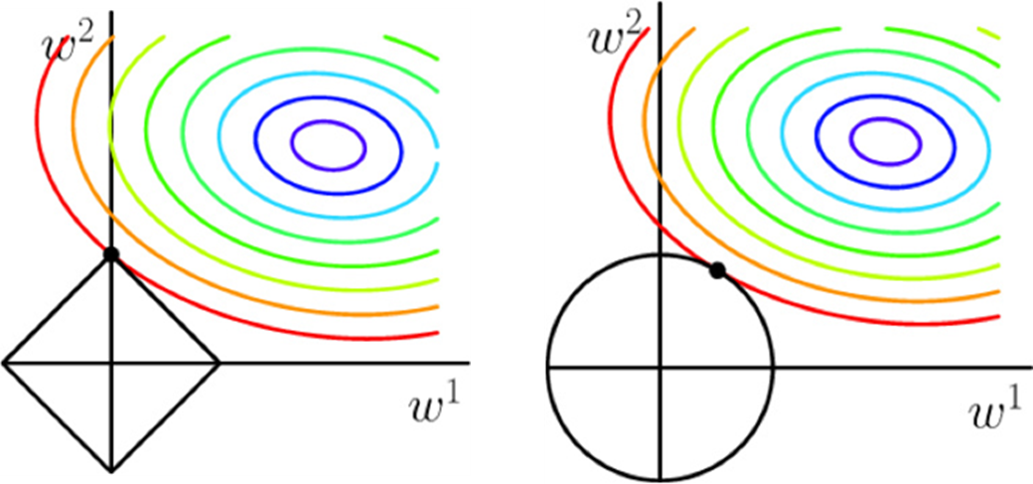

#### 5.2.4.2 变量相关性分析

**1. 变量两两相关性分析**

对于自变量$X_1,X_2$，如果存在常数$c_0,c_1,c_2$使得以下线性等式近似成立：

$$c_1X_1 + c_2X_2 ≈ c_0$$

称自变量$X_1,X_2$具有较强的线性相关性。

两变量间的线性相关性可以利用皮尔森相关系数来衡量。系数的取值为[-1.0,1.0]，相关系数越接近0的说明两变量线性相关性越弱，越接近1或-1两变量线性相关性越强。

$$r_{X,Y} = \frac{cov(X,Y)}{\sigma_X\sigma_Y} = \frac{E((X - \bar{X})(Y - \bar{Y}))}{\sqrt{\sum_{i=1}^n(X_i - \bar{X})^2}\sqrt{\sum_{i=1}^n(Y_i - \bar{Y})^2}} = \frac{E(XY) - E(X)E(Y)}{\sqrt{E(X^2) - E^2(X)}\sqrt{E(Y^2) - E^2(Y)}}$$

<font color=red>当两变量的相关系数大于阈值时（一般阈值设为0.7或0.4），剔除IV值较低的变量，或分箱严重不均衡的变量。</font>

**2. 变量的多重共线性分析**

对于自变量$X_1,X_2,\dots,X_n$，如果存在常数$c_0,c_1,c_2,\dots,c_n$使得以下线性等式近似成立：

$$c_1X_1 + c_2X_2 + \dots + c_nX_n ≈ c_0$$

称自变量$X_1,X_2,\dots,X_n$具有较强的多重共线性。

通常用VIF值来衡量一个变量和其它变量的多重共线性：

$$VIF_i = \frac{1}{1 - R_i^2}$$

其中$R_i$为$X_i$与其它自变量的复相关系数。

$$R_i = \frac{\sum(X_i - \overline{X}_i)(\widehat{X}_i - \overline{X}_i)}{\sqrt{\sum(X_i -\overline{X}_i)^2\sum(\widehat{X}_i - \overline{X}_i)^2}}$$

其中：$\widehat{X}_i$为其它变量的线性表示$\widehat{X}_i = θ_0 + θ_1X_1 + \dots + θ_{i-1}X_{i-1} + θ_{i+1}X_{i+1} + \dots$，$\overline{X}_i$为变量$X_i$的均值

当某个变量的VIF大于阈值时（一般阈值设为10或7），需要逐一剔除解释变量。当剔除掉$X_k$时，发现VIF低于阈值，从$\{X_k,X_i\}$中剔除IV值较低的一个。

为什么要进行相关性分析？

设想建立一个具有两变量$X_1$和$X_2$的线性模型，真实模型是$Y = X_1 + X_2$。如果$X_1$和$X_2$线性相关（比如$X_1 ≈ X_2$），那么拟合模型$Y = 3X_2, Y = 2X_1 - X_2$或$Y = 51X_1 - 99X_2$的效果都一样好，理想状态下，系数权重会有无数种取法，使系数权重变得无法解释，导致变量的每个分段的得分也有无数种取法。<font color=red>（变量中不同分段的平方需要用到变量的系数）</font>

即使不进行线性相关性分析也不会影响模型的整体性能，进行相关性分析只是为了让模型更易解释，保证不同的分箱得分正确。

一个模型如果用一个自变量就可以表示，就不要用多个自变量来增加冗余的计算量了！！

总结一下变量筛选的意义：

* 剔除跟目标变量不太相关的特征
* 消除由于现行相关的变量，避免特征冗余（可联系高数里的向量间的线性相关，便于理解）
* 减轻后期验证、不熟、监控的负担
* 保证变量的可解释性

#### 5.2.5 构建逻辑回归模型

主要包括构建初步的逻辑回归模型，根据p-value进行变量筛选，根据各个变量的系数符号进行筛选，得到最终的逻辑回归模型。

以下为几种常用模型的优势和劣势对比：

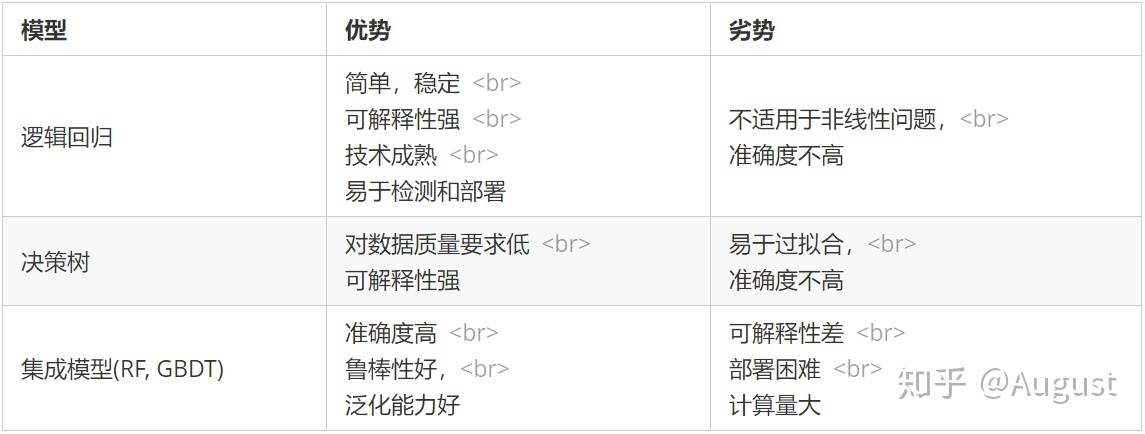

由于逻辑回归模型具有简单，稳定，可解释性强，技术成熟和易于检测和部署等优势，逻辑回归是评分卡模型最经常使用的算法。

#### 5.2.5.1 根据p-value进行筛选

p-value是假设检验的里面的概念。模型假设某自变量与因变量线性无关，p-value可以理解为该假设成立的可能性。一般，当p-value大于阈值时，表示假设显著，即自变量与因变量线性无关；当p-value小于阈值时，表示假设不显著，即自变量与因变量线性相关。阈值又称为显著性水平，通常取0.05。

因此当某个字段的p-value大于0.05时，应该删除此变量。该变量冗余。

#### 5.2.5.2 根据系数符号进行筛选

检查逻辑回归模型中各个变量的系数，如果所有变量的系数均为正数，模型有效。假如有一些变量的系数出现了负数，说明有一些自变量的线性相关性较强，需要进一步进行变量筛选。通常的做法是：

* 综合考虑变量的IV值和业务的建议，按照变量的优先级进行降序排列；
* 选择优先级最高的4-5个基本变量；
* 按优先级从高到低逐渐添加变量，当新添加的变量之后，出现系数为负的情况，舍弃该变量；
* 直到添加最后一个变量。

#### 5.2.6 模型评价

#### 5.2.6.1 混淆矩阵，TPR，FPR

TPR（或Recall）为坏客户的查全率，表示被模型抓到的坏客户占总的坏客户的比例，表达式为：

$$TPR = \frac{TP}{TP + FN}$$

FPR为好客户误判率，表示好客户中被模型误判的比例，表达式为：

$$FPR = \frac{FP}{FP + TN}$$

风控模型的两个指标：抓坏客户的能力和好客户被误判的情况

可以把TPR看做模型的收益，FPR看做模型付出的代价。如果一个模型TPR越大，表示模型能够抓到的坏客户比例越大，即收益越大；FPR越大，表示模型能够讲好客户误抓的比例越大，即代价越大。

#### 5.2.6.2 AUC

AUC表示模型对任意坏客户的输出结果为大于模型对任意好客户的输出结果的概率。AUC的取值范围在0.5和1之间，AUC越大，表示模型预测性能越好。

#### 5.2.6.3 KS值

KS值表示了模型区分好坏客户的能力。其实质是TPR-FPR岁好坏客户阈值变化的最大值。KS的取值范围在0.5和1之间，值越大，模型的预测准确性越好。一般，KS > 0.4即认为模型有比较好的预测性能。

#### 5.2.7 转化为评分卡

我们将客户违约的概率表示为p，则正常的概率为1-p。由逻辑回归的基本原理可得：

$$p = \frac{1}{1 + e^{-θ^Tx}}$$

整理以上公式：

$$\log\left(\frac{p}{1 - p}\right) = θ^Tx$$

我们可以定义比例来表示客户违约的相对概率：

$\text{odds} = \frac{p}{1 - p}$

将odds带入可得：

$$\log\left(\text{odds}\right) = θ^Tx$$

评分卡的分支可以定义为比率对数的线性表达，即：

$$Score = A - B \times \log(\text{odds})$$

其中A与B是常数，B前面的负号可以使得违约概率越低，得分越高。通常情况下，即高分值代表低风险，地分值代表高风险。

A，B的值可以通过将两个已知或假设的分值带入计算得到。通常情况下，需要设定两个假设：
* 某个特定的违约概率下的预期评分，即比率odds为$θ_0$时的分数为$P_0$
* 该违约概率翻倍的评分（PDO）

根据以上的分析，则odds为$2θ_0$时的分数为$P_0 - PDO$，带入以上线性表达式，可得：

$$P_0 = A - B \times \log(θ_0)$$
$$P_0 -PDO = A - B \times \log(2θ_0)$$

<font color=orange>说明：因违约概率越大，odds则也越大，log(odds)也会变大，固然最终分数会减小，则需要减去一个值PDO才能达到要求。</font>

$P_0$是基础分，$θ_0$是基础分下对应的odds；$P_0 - PDO$是2倍的odds下的分数。

解方程组，可得：

$$B = \frac{PDO}{\log2}$$
$$A = P_0 + B * \log(θ_0)$$

实际应用中，我们会计算出每个变量的各分箱对应的分支。新用户产生时，对应到每个分箱的值，将这些值相加，最后加上初始基础分，得到最终的结果。

$$Score = A - B \times \log(θ_0 + θ_1x_1 + \dots + θ_nx_n)$$

式中：变量$x_1,\dots,x_n$是出现在最终模型的入模变量。由于所有的入模变量都进行了WOE编码，可以将这些变量中的每一个都写$(θ_iw_{ij})δ_{ij}$的形式：

$$Score = A - B
\begin{Bmatrix}\theta_0 \\
+ (\theta_1w_{11})\delta_{11} + (\theta_1w_{12})\delta_{12} + \dots \\
\dots \\
+ (\theta_nw_{n1})\delta_{n1} + (\theta_nw_{n2})\delta_{n2} + \dots
\end{Bmatrix}$$

其中，$A - B\theta_0$为基础分数，$\theta_i$为逻辑回归中第$i$个自变量的系数，$w_{ij}$第$i$个变量的第$j$个分箱的WOE值，$\delta_{ij}$是0,1逻辑变量，当$\delta_{ij} = 1$代表自变量$i$取第$j$个分箱，当$\delta_{ij} = 0$代表自变量$i$不取第$j$个分箱。最终得到评分卡模型：

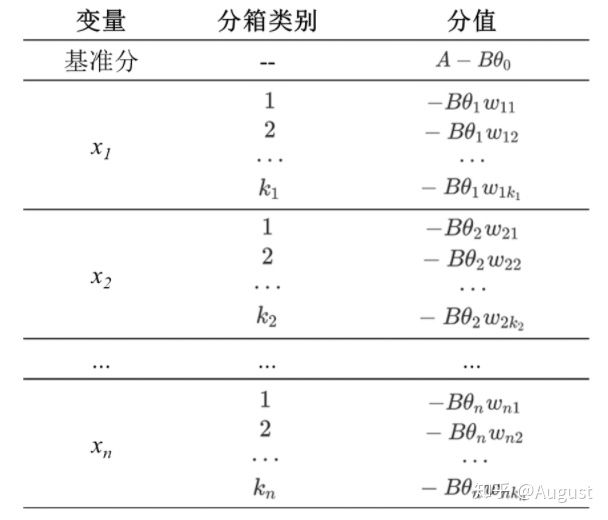

以上公式中，我们发现每个分箱的评分都可以表示为$-B(\theta_iw_{ij})$，也就是说影响每个分箱的因素包括三部分，分别为参数$B$，变量数$\theta_i$，
和对应分箱的WOE编码$w_{ij}$。

#### 5.2.8 小结

最后我们再来回答最初的三个问题作为本文的小结：

1. 用户的属性有千千万万个维度，而评分卡模型所选用的字段在30个以下，那么怎样挑选这些字段呢？

    * 变量预测能力筛选（WOE编码）
    * 变量相关性分析（包括两两相关性分析，多重共线性分析）
    * 根据p-value筛选
    * 根据变量的系数符号进行筛选
    * 基于IV值变量筛选，一般是筛选掉分箱不均衡和坏客户比例较多的分箱
    
2. 评分卡模型采用的对每个字段的分段进行评分，那么怎样对评分卡进行分段呢？

    * 变量分箱
    
3. 怎样对字段的每个分段进行评分呢？这个评分是怎么来的？

    * WOE编码
    * 将预测概率值转换为评分：$Score = A - B \times \log(odds)$
    * 利用变量相关性分析和变量的系数符号保证每个分箱评分的合理性